<a href="https://colab.research.google.com/github/ZhaoJiaxin107/Face_Recognition/blob/master/facial_detection_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
import copy
import matplotlib.pyplot as plt
import multiprocessing

**Next we should install PyTorch**

In [0]:
import torchvision
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data
import torch.nn.functional as F
from torchvision import datasets,transforms,models
from torch.utils.data import DataLoader,Dataset,TensorDataset
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler

In [0]:
import cv2

In [0]:
import os 
!ls 

facial_keypoints.ipynb	fig.jpg				 test.csv
fig_detection.jpg	haarcascade_frontalface_alt.xml  training.csv


In [0]:
os.chdir("/content/gdrive/My Drive/Colab Notebooks/facial_keypoints")
!ls

facial_keypoints.ipynb	fig.jpg				 test.csv
fig_detection.jpg	haarcascade_frontalface_alt.xml  training.csv


In [0]:
class FaceDetection():
  def __init__(self,path2img='fig.jpg',path2class='haarcascade_frontalface_alt.xml'):

    # Load Image
    self.img_original = cv2.imread(path2img)

    # Convert to RGB colorspace
    self.img_original = self.convertToRGB(self.img_original)

    # Copy original image
    self.img_with_detections = np.copy(self.img_original)

    # Convert image to gray(opencv expects gray images)
    self.gray_img = self.convertToGray(self.img_original)

    # load cascade classifier (haarcascade) training file
    self.haar_face_cascade = cv2.CascadeClassifier(path2class)

    # Detect multiscale images
    self.faces = self.haar_face_cascade.detectMultiScale(self.gray_img,scaleFactor = 1.1,minNeighbors=5);

  def number_faces(self):
    #print the number of faces found
    print('Face found:',len(self.faces))
  
  def convertToGray(self,img):
    #Convert the RGB image to grayscale
    return cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

  def convertToRGB(self, img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  def detection(self):

    faces_crop = []
    for (x,y,w,h) in self.faces:
      obj = self.img_original[y:y+h,x:x+w]
      faces_crop.append(obj)
      cv2.rectangle(self.img_with_detections,(x,y),(x+w,y+h),(0,255,0),2)
    return faces_crop

In [0]:
FaceDetection = FaceDetection()

In [0]:
FaceDetection.number_faces()

Face found: 11


In [0]:
face_crop = FaceDetection.detection()
(img_original,img_with_detections) = (FaceDetection.img_original,FaceDetection.img_with_detections)

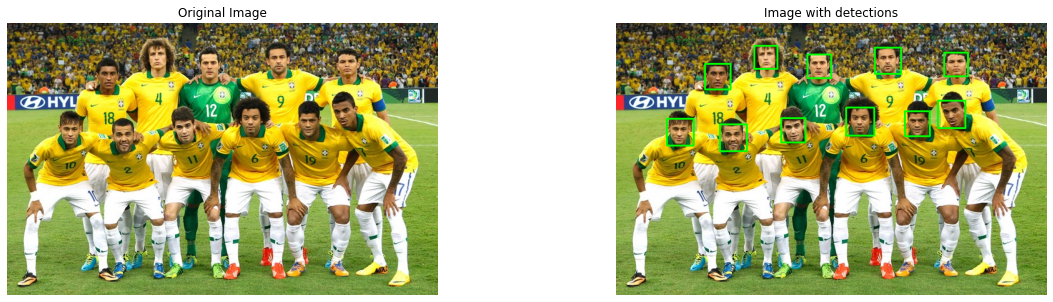

In [0]:
fig = plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.imshow(img_original)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
#Convert image to RGB and show image
plt.imshow(img_with_detections)
plt.title('Image with detections')
plt.axis('off')

fig.savefig('fig_detection.png')

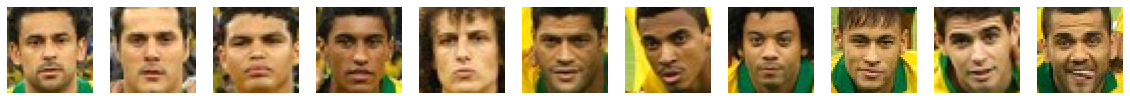

In [0]:
plt.figure(figsize = (20,5))
count = 1
for face in face_crop:
  plt.subplot(1,len(face_crop),count)
  count+=1
  plt.imshow(face)
  plt.axis('off')

In [0]:
use_gpu = torch.cuda.is_available()
print('GPU available:',use_gpu)

GPU available: True


In [0]:
cpu_count = multiprocessing.cpu_count()
print('cpu_count:',cpu_count)

cpu_count: 2
